In [72]:
import numpy as np
import matplotlib.pyplot as plt
import models
import metrics

In [58]:
# Data: [city, price, sales/week]
data = np.array([
    [1,  0.59, 3980],
    [2,  0.80, 2200],
    [3,  0.95, 1850],
    [4,  0.45, 6100],
    [5,  0.79, 2100],
    [6,  0.99, 1700],
    [7,  0.90, 2000],
    [8,  0.65, 4200],
    [9,  0.79, 2440],
    [10, 0.69, 3300],
    [11, 0.79, 2300],
    [12, 0.49, 6000],
    [13, 1.09, 1190],
    [14, 0.95, 1960],
    [15, 0.79, 2760],
    [16, 0.65, 4330],
    [17, 0.45, 6960],
    [18, 0.60, 4160],
    [19, 0.89, 1990],
    [20, 0.79, 2860],
    [21, 0.99, 1920],
    [22, 0.85, 2160]
])

In [73]:
# ======= Linear Regression (y = ax + b) =======
A1, b1 = models.generate_matrices(data[:, 1:], degree=1)  # Only Price & Sales columns

# Modelos
theta_ls1 = models.least_squares(A1, b1)
theta_gd1 = models.gradient_descent(A1, b1, lr=0.01, max_iter=1000)

# Valores de prediccion
y_ls1 = A1 @ theta_ls1
y_gd1 = A1 @ theta_gd1
print(theta_ls1)
print(theta_gd1)

[ 9510.09957156 -8314.36447574]
[ 9403.55491231 -8178.59801852]


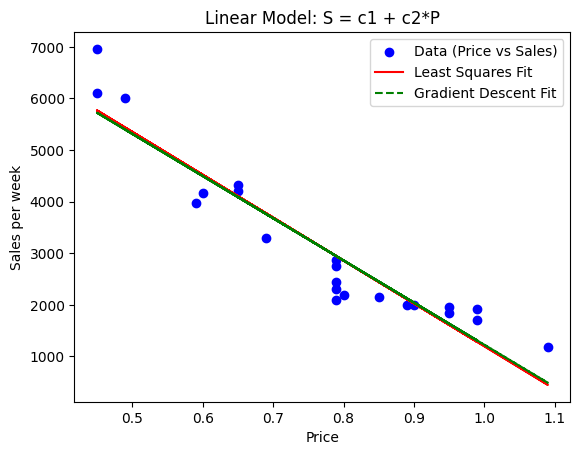

In [74]:
# ======= Plot Results =======
x = data[:, 1]
y = data[:, 2]

plt.scatter(x, y, color='blue', label="Data (Price vs Sales)")
plt.plot(x, y_ls1, color='red', label="Least Squares Fit")
plt.plot(x, y_gd1, color='green', linestyle="--", label="Gradient Descent Fit")

plt.xlabel("Price")
plt.ylabel("Sales per week")
plt.title("Linear Model: S = c1 + c2*P")
plt.legend()
plt.show()

In [75]:
# ======= Quadratic Regression (S = ap^2 + bp + c) =======

# (Sin normalizar)

A2, b2 = models.generate_matrices(data[:, 1:], degree=2)

# Modelos
theta_ls2 = models.least_squares(A2,b2)
theta_gd2 = models.gradient_descent(A2, b2, lr=0.01, max_iter=1000)

# Valores de prediccion
y_ls2 = A2 @ theta_ls2
y_gd2 = A2 @ theta_gd2

print(y_gd2)

[4570.04894381 2970.42966114 1631.154701   5457.98405535 3053.8868138
 1246.33244936 2095.79170237 4145.79648942 3053.8868138  3848.39190811
 3053.8868138  5218.85792092  233.28317924 1631.154701   3053.8868138
 4145.79648942 5457.98405535 4501.16140288 2186.53366088 3053.8868138
 1246.33244936 2542.21668908]


In [81]:
A2

array([[1.    , 0.59  , 0.3481],
       [1.    , 0.8   , 0.64  ],
       [1.    , 0.95  , 0.9025],
       [1.    , 0.45  , 0.2025],
       [1.    , 0.79  , 0.6241],
       [1.    , 0.99  , 0.9801],
       [1.    , 0.9   , 0.81  ],
       [1.    , 0.65  , 0.4225],
       [1.    , 0.79  , 0.6241],
       [1.    , 0.69  , 0.4761],
       [1.    , 0.79  , 0.6241],
       [1.    , 0.49  , 0.2401],
       [1.    , 1.09  , 1.1881],
       [1.    , 0.95  , 0.9025],
       [1.    , 0.79  , 0.6241],
       [1.    , 0.65  , 0.4225],
       [1.    , 0.45  , 0.2025],
       [1.    , 0.6   , 0.36  ],
       [1.    , 0.89  , 0.7921],
       [1.    , 0.79  , 0.6241],
       [1.    , 0.99  , 0.9801],
       [1.    , 0.85  , 0.7225]])

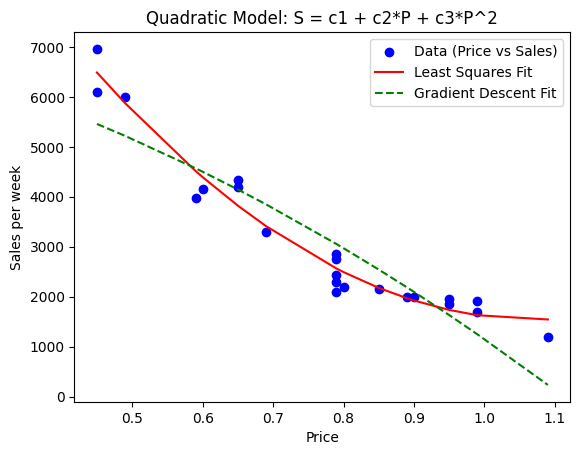

In [76]:
# Sort x (prices) and re-order everything accordingly
sorted_indices = np.argsort(x)  # Get sorted indices
x_sorted = x[sorted_indices]    # Sort x values
y_ls2_sorted = y_ls2[sorted_indices]  # Sort least squares predictions
y_gd2_sorted = y_gd2[sorted_indices]  # Sort gradient descent predictions

# Plot data and quadratic fits
plt.scatter(x, y, color='blue', label="Data (Price vs Sales)")
plt.plot(x_sorted, y_ls2_sorted, color='red', label="Least Squares Fit")
plt.plot(x_sorted, y_gd2_sorted, color='green', linestyle="--", label="Gradient Descent Fit")

plt.xlabel("Price")
plt.ylabel("Sales per week")
plt.title("Quadratic Model: S = c1 + c2*P + c3*P^2")
plt.legend()
plt.show()

In [77]:
# ======= Quadratic Regression (S = ap^2 + bp + c) =======

# (Normalizando)
A2_norm = A2.copy()  # Copy A2 to avoid modifying the original

for i in range(A2_norm.shape[1]):
    std_i = np.std(A2_norm[:, i])
    if std_i != 0:  # Only normalize if standard deviation is nonzero
        A2_norm[:, i] = (A2_norm[:, i] - np.mean(A2_norm[:, i])) / std_i

# Modelo
theta_gd2_norm = models.gradient_descent(A2_norm, b2, lr=0.01, max_iter=1000)

# Valores de prediccion
y_gd2_norm = A2_norm @ theta_gd2_norm


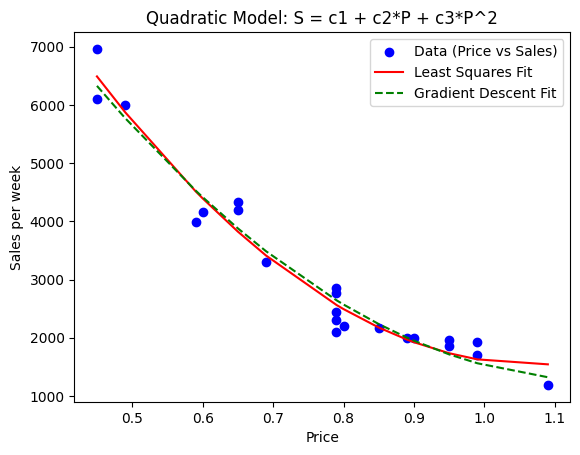

In [78]:
# Sort x (prices) and re-order everything accordingly
sorted_indices = np.argsort(x)  # Get sorted indices
x_sorted = x[sorted_indices]    # Sort x values
y_ls2_sorted = y_ls2[sorted_indices]  # Sort least squares predictions
y_gd2_sorted = y_gd2_norm[sorted_indices]  # Sort gradient descent predictions

# Plot data and quadratic fits
plt.scatter(x, y, color='blue', label="Data (Price vs Sales)")
plt.plot(x_sorted, y_ls2_sorted, color='red', label="Least Squares Fit")
plt.plot(x_sorted, y_gd2_sorted, color='green', linestyle="--", label="Gradient Descent Fit")

plt.xlabel("Price")
plt.ylabel("Sales per week")
plt.title("Quadratic Model: S = c1 + c2*P + c3*P^2")
plt.legend()
plt.show()

In [79]:
def compute_errors(y_true, y_pred):
    """Computes RSS, MSE, RMSE, and R² for given predictions."""
    rss = np.sum((y_true - y_pred) ** 2)
    mse = rss / len(y_true)
    rmse = np.sqrt(mse)
    r2 = 1 - (rss / np.sum((y_true - np.mean(y_true)) ** 2))
    
    return {"RSS": rss, "MSE": mse, "RMSE": rmse, "R2": r2}

errors_ls_lin = compute_errors(y, y_ls1)
errors_gd_lin = compute_errors(y, y_gd1)

errors_ls_quad = compute_errors(y, y_ls2)
errors_gd_quad = compute_errors(y, y_gd2)

print("Numero condicion lineal:", metrics.condition_number(A1))
print("Numero condicion cuadratico (sin normalizar):", metrics.condition_number(A2))

Numero condicion lineal: 9.094314746721137
Numero condicion cuadratico (sin normalizar): 80.31762760881362


/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

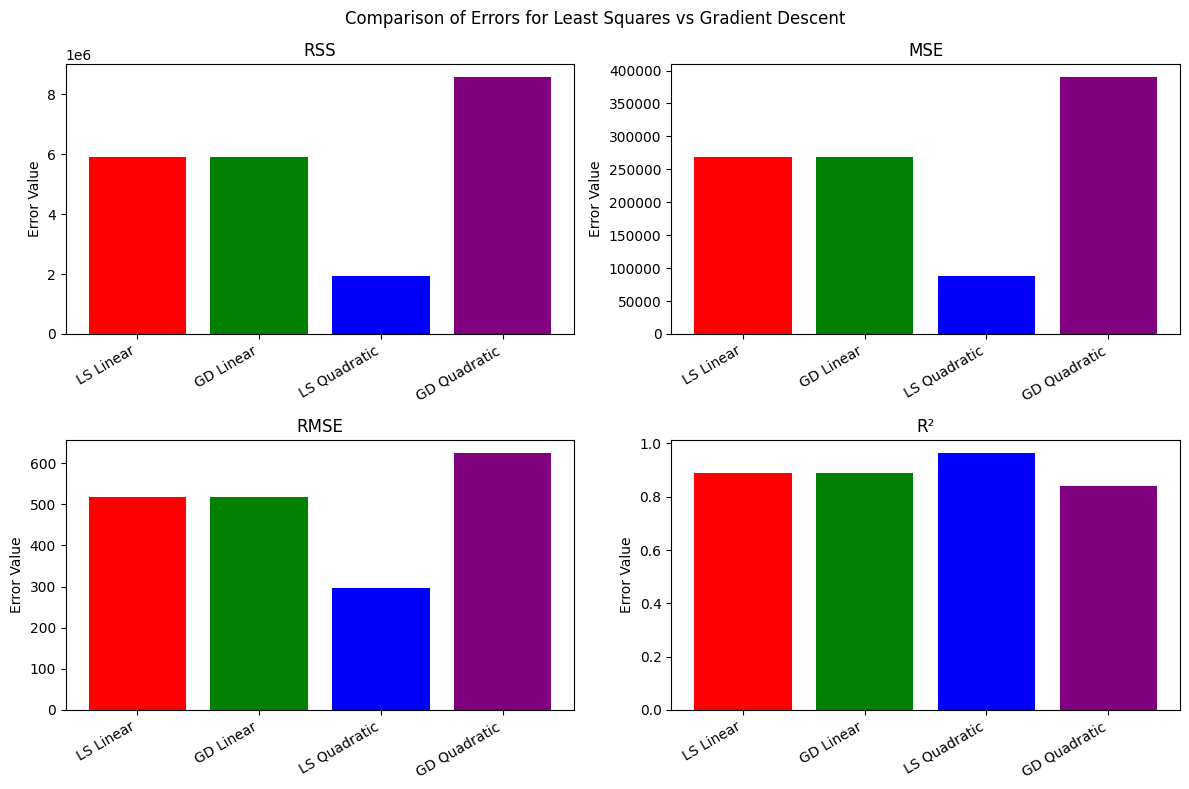

In [80]:
# ---- Bar Plot for Error Comparison ----
labels = ["RSS", "MSE", "RMSE", "R²"]
methods = ["LS Linear", "GD Linear", "LS Quadratic", "GD Quadratic"]

# Extracting values
error_values = np.array([
    list(errors_ls_lin.values()),
    list(errors_gd_lin.values()),
    list(errors_ls_quad.values()),
    list(errors_gd_quad.values())
])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.bar(methods, error_values[:, i], color=["red", "green", "blue", "purple"])
    ax.set_title(labels[i])
    ax.set_ylabel("Error Value")
    ax.set_xticklabels(methods, rotation=30, ha="right")

plt.suptitle("Comparison of Errors for Least Squares vs Gradient Descent")
plt.tight_layout()
plt.show()

In [67]:
errors_gd_quad_norm = compute_errors(y, y_gd2_norm)
print("Numero condicion cuadratico (normalizando):", metrics.condition_number(A2_norm))

Numero condicion cuadratico (normalizando): 15.846771081058636


/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3237291613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3237291613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3237291613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_18021/3237291613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

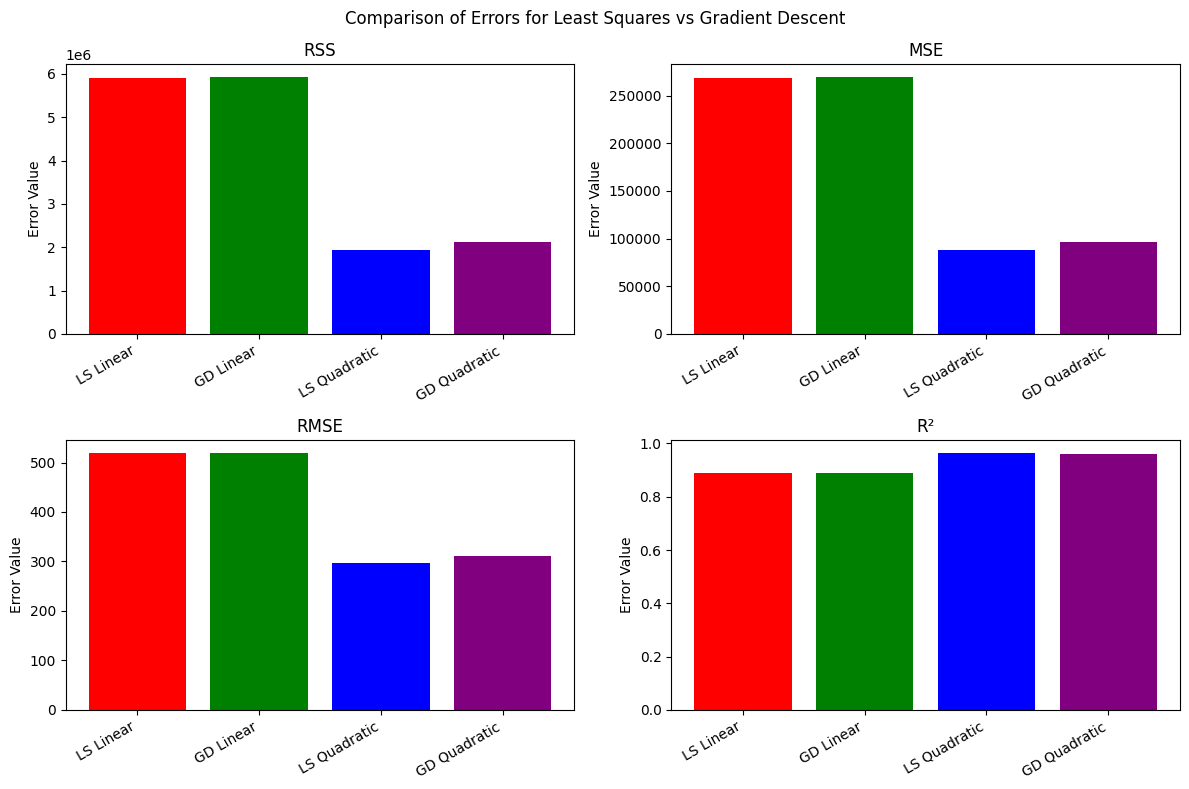

In [68]:
# Extracting values
error_values = np.array([
    list(errors_ls_lin.values()),
    list(errors_gd_lin.values()),
    list(errors_ls_quad.values()),
    list(errors_gd_quad_norm.values())
])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.bar(methods, error_values[:, i], color=["red", "green", "blue", "purple"])
    ax.set_title(labels[i])
    ax.set_ylabel("Error Value")
    ax.set_xticklabels(methods, rotation=30, ha="right")

plt.suptitle("Comparison of Errors for Least Squares vs Gradient Descent")
plt.tight_layout()
plt.show()